In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("C:\\Users\\HP\\Desktop\\PW_Projects\\Body_Mass_Index_from_Face_Images\\notebooks\\Height_to_Weight_Data_and_Models\\HWG_Data.csv")

In [4]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
data["Height"] = [(h*0.0254) for h in data["Height"]]
data["Weight"] = [(w*0.453592) for w in data["Weight"]]

In [6]:
data.head()

,Gender,Height,Weight
0,Male,1.875714,109.720985
1,Male,1.747060,73.622732
2,Male,1.882397,96.497550
3,Male,1.821967,99.809504
4,Male,1.774998,93.598619


In [7]:
data.to_csv(r"C:\Users\HP\Desktop\PW_Projects\Body_Mass_Index_from_Face_Images\notebooks\Height_to_Weight_Data_and_Models\HWG_Data_Updated.csv")

In [64]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

* There are no missing values in dataset.

In [65]:
data[data.duplicated()]

,Gender,Height,Weight


* There are no duplicated datapoints in dataset

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [67]:
data["Gender"].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

In [68]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,1.685736,73.228054
std,0.097727,14.564131
min,1.378284,29.347460
25%,1.613043,61.605982
50%,1.684479,73.124894
75%,1.757026,84.898599
max,2.006568,122.465167


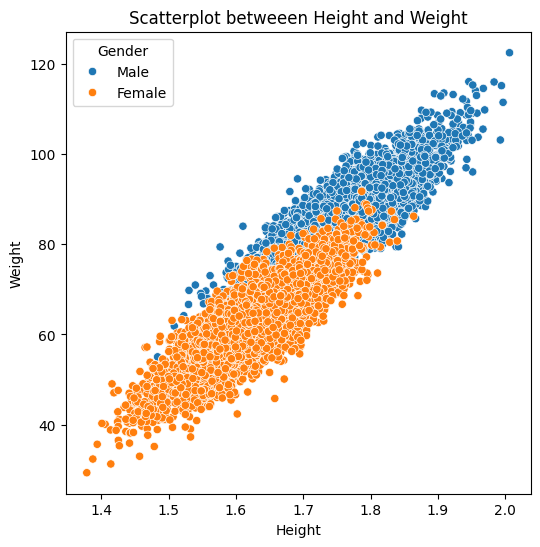

In [69]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data["Height"],y=data["Weight"],hue=data["Gender"])
plt.title("Scatterplot betweeen Height and Weight")
plt.show()

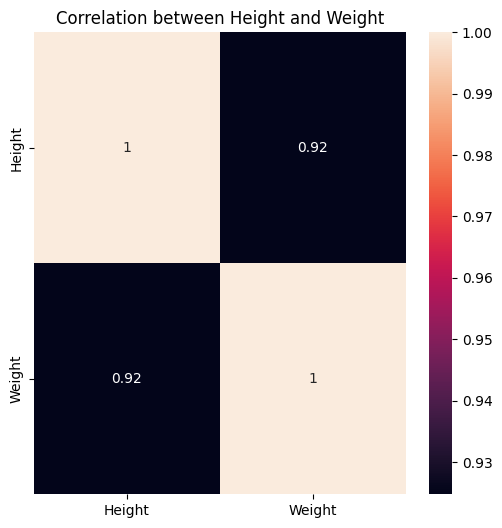

In [70]:
plt.figure(figsize=(6,6))
sns.heatmap(data[["Height","Weight"]].corr(),annot=True)
plt.title("Correlation between Height and Weight")
plt.show()

* We found high positive correlation between Height and Weight

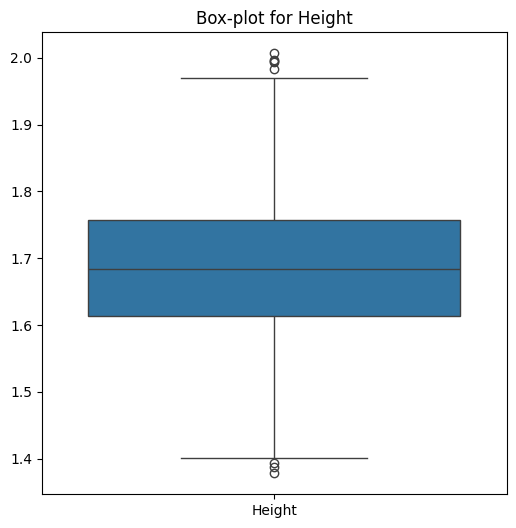

In [71]:
plt.figure(figsize=(6,6))
sns.boxplot(data[["Height"]])
plt.title("Box-plot for Height")
plt.show()

* We can see there are some outliers for "Height" in given dataset

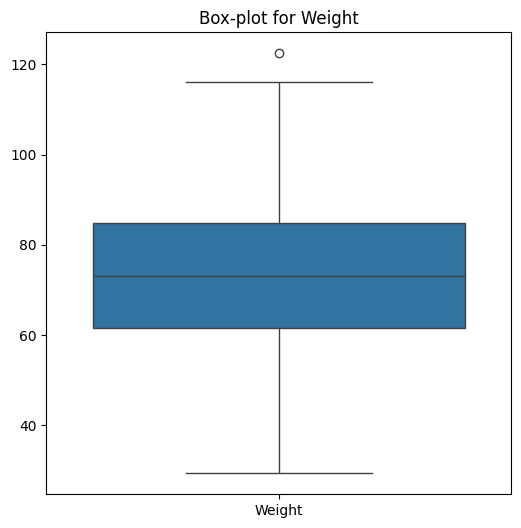

In [72]:
plt.figure(figsize=(6,6))
sns.boxplot(data[["Weight"]])
plt.title("Box-plot for Weight")
plt.show()

* There is very few outliers for Weights data in given dataset.

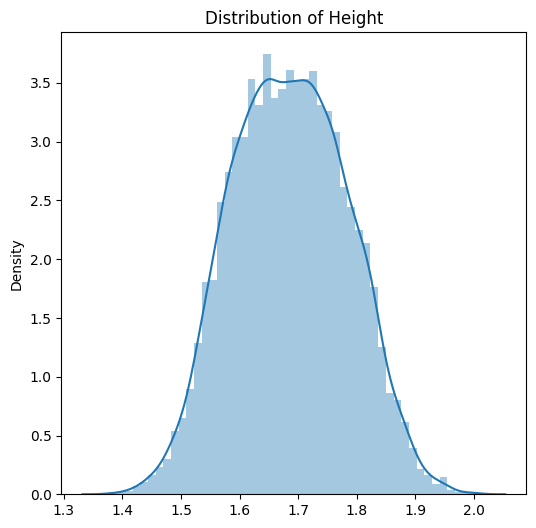

In [73]:
plt.figure(figsize=(6,6))
sns.distplot(data[["Height"]])
plt.title("Distribution of Height")
plt.show()

* The height data is almost normally distibuted with majority of data-points has height between 1.6 to 1.8 meters

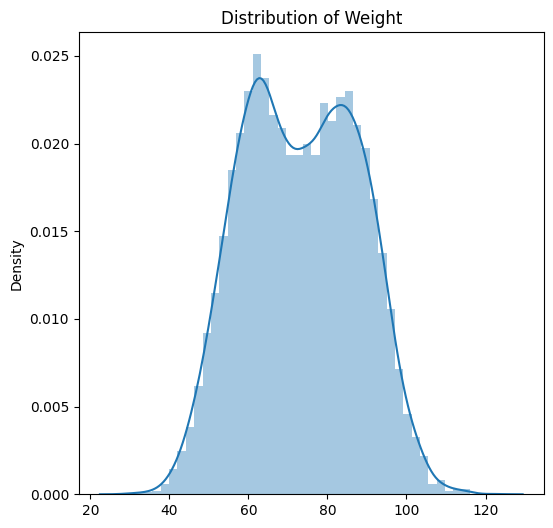

In [74]:
plt.figure(figsize=(6,6))
sns.distplot(data[["Weight"]])
plt.title("Distribution of Weight")
plt.show()

* Majority of weight is distributed between 45kg to 90kg

## Analysing height for scrapped data

In [75]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\PW_Projects\\Body_Mass_Index_from_Face_Images\\artifacts\\img_name_and_height.csv")

In [76]:
df.head()

,image_name,height
0,Bruce-Lee.jpg,167
1,Burt-Bacharach.jpg,166
2,Lee-Van-Cliff.jpg,182
3,Anthony-Quinn.jpg,177
4,Graham-Greene.jpg,174


In [77]:
df["height"] = [(h*0.01) for h in df["height"]]

In [78]:
df.head()

,image_name,height
0,Bruce-Lee.jpg,1.67
1,Burt-Bacharach.jpg,1.66
2,Lee-Van-Cliff.jpg,1.82
3,Anthony-Quinn.jpg,1.77
4,Graham-Greene.jpg,1.74


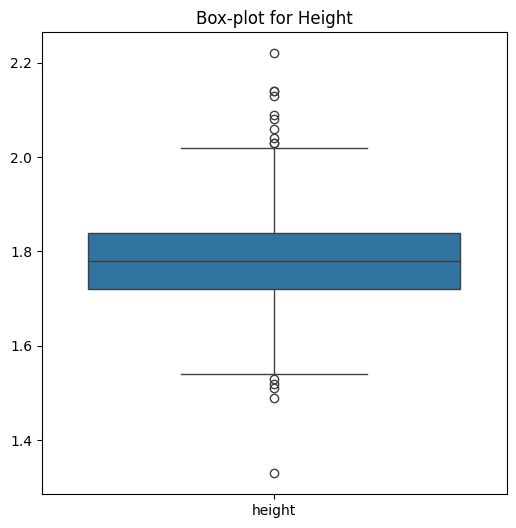

In [79]:
plt.figure(figsize=(6,6))
sns.boxplot(df[["height"]])
plt.title("Box-plot for Height")
plt.show()

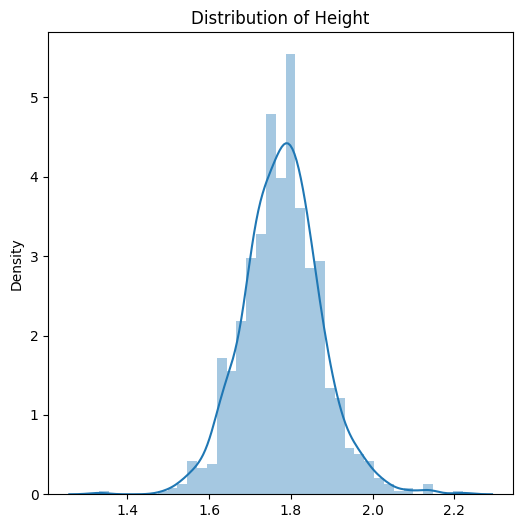

In [80]:
plt.figure(figsize=(6,6))
sns.distplot(df[["height"]])
plt.title("Distribution of Height")
plt.show()

In [81]:
def outlier_detector_remover(data,threshold):
    numerical_col = [col for col in data.columns if data[col].dtype != 'object']
    for col in numerical_col:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (IQR*threshold)
        upper_bound = Q3 + (IQR*threshold)
        outliers = (data[col] < lower_bound) | (data[col] > upper_bound)
        data = data[~outliers]
        data = data.reset_index(drop=True)
    return data

In [82]:
data = outlier_detector_remover(data,1.5)

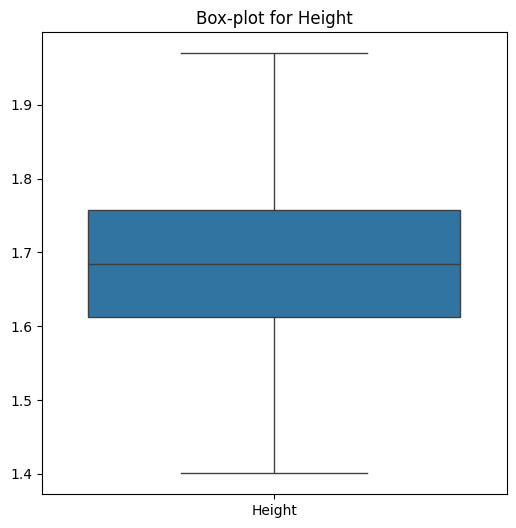

In [83]:
plt.figure(figsize=(6,6))
sns.boxplot(data[["Height"]])
plt.title("Box-plot for Height")
plt.show()

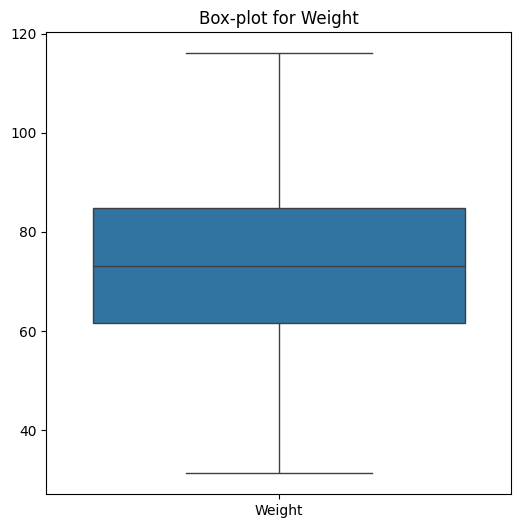

In [84]:
plt.figure(figsize=(6,6))
sns.boxplot(data[["Weight"]])
plt.title("Box-plot for Weight")
plt.show()

In [55]:
data.shape

(9992, 3)

In [85]:
data["Gender"] = [1 if gender == "Male" else 0 for gender in data["Gender"]]

In [86]:
data

,Gender,Height,Weight
0,1,1.875714,109.720985
1,1,1.747060,73.622732
2,1,1.882397,96.497550
3,1,1.821967,99.809504
4,1,1.774998,93.598619
...,...,...,...
9987,0,1.680785,62.041159
9988,0,1.703506,77.504315
9989,0,1.622247,58.275377
9990,0,1.753470,74.322166


In [87]:
X = data[["Gender","Height"]]
y = data["Weight"]

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [89]:
from sklearn.preprocessing import StandardScaler
Standard_Scaler = StandardScaler()
X_train_Standard_Scaler = Standard_Scaler.fit_transform(X_train)
X_test_Standard_Scaler = Standard_Scaler.transform(X_test)

In [90]:
from sklearn.preprocessing import MinMaxScaler
Min_Max_Scaler = MinMaxScaler()
X_train_Min_Max_Scaler = Min_Max_Scaler.fit_transform(X_train)
X_test_Min_Max_Scaler = Min_Max_Scaler.transform(X_test)

In [91]:
from sklearn.preprocessing import RobustScaler
Robust_Scaler = RobustScaler()
X_train_Robust_Scaler = Robust_Scaler.fit_transform(X_train)
X_test_Robust_Scaler = Robust_Scaler.transform(X_test)

In [92]:
from sklearn.preprocessing import MaxAbsScaler
MaxAbs_Scaler = MaxAbsScaler()
X_train_MaxAbs_Scaler = MaxAbs_Scaler.fit_transform(X_train)
X_test_MaxAbs_Scaler = MaxAbs_Scaler.transform(X_test)

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def metrics(y_actual,y_predicted):
    MAE = mean_absolute_error(y_actual,y_predicted)
    MSE = mean_squared_error(y_actual,y_predicted)
    RMSE = (MSE**0.5)
    r2 = r2_score(y_actual,y_predicted)
    return MAE,MSE,RMSE,r2

In [94]:
X_data = {"X_without_scaling":[X_train,X_test],
          "X_Min_Max_Scaler":[X_train_Min_Max_Scaler,X_test_Min_Max_Scaler],
          "X_Standard_Scaler":[X_train_Standard_Scaler,X_test_Standard_Scaler],
          "X_Robust_Scaler":[X_train_Robust_Scaler,X_test_Robust_Scaler],
          "X_MaxAbs_Scaler":[X_train_MaxAbs_Scaler,X_test_MaxAbs_Scaler]}

In [43]:
from sklearn.svm import SVR
def SVM():
    SV_Regressor = SVR()
    for key,value in X_data.items():
        print(f'Working with: {key}')
        print("--------------------------------------------------------------------------------------------------------------------------------------------------")
        SV_Regressor.fit(value[0],y_train)
        print(f'Done with fitting the data using: {key}')
        print(f'Prediction started with: {key}')
        y_predicted = SV_Regressor.predict(value[1])
        print(f'Prediction completed with: {key}')
        print(f"Calculating metrics for {key}")
        MAE,MSE,RMSE,r2 = metrics(y_test,y_predicted)
        print(f"The Mean absolute error using data with, {key[2:]} is {MAE}")
        print(f"The Mean squared error using data with, {key[2:]} is {MSE}")
        print(f"The Root Mean squared error using data with, {key[2:]} is {RMSE}")
        print(f"The R2_sqaure using data with, {key[2:]} is {r2}")
        print("==================================================================================================================================================")
SVM()

Working with: X_without_scaling
--------------------------------------------------------------------------------------------------------------------------------------------------
Done with fitting the data using: X_without_scaling
Prediction started with: X_without_scaling
Prediction completed with: X_without_scaling
Calculating metrics for X_without_scaling
The Mean absolute error using data with, without_scaling is 3.7034893266567215
The Mean squared error using data with, without_scaling is 21.44339832663956
The Root Mean squared error using data with, without_scaling is 4.630701709961413
The R2_sqaure using data with, without_scaling is 0.9005496982783994
Working with: X_Min_Max_Scaler
--------------------------------------------------------------------------------------------------------------------------------------------------
Done with fitting the data using: X_Min_Max_Scaler
Prediction started with: X_Min_Max_Scaler
Prediction completed with: X_Min_Max_Scaler
Calculating metri

In [95]:
from sklearn.linear_model import LinearRegression
def Simple_Linear_Regression():
    Linear_Regression = LinearRegression()
    for key,value in X_data.items():
        print(f'Working with: {key}')
        print("--------------------------------------------------------------------------------------------------------------------------------------------------")
        Linear_Regression.fit(value[0],y_train)
        print(f'Done with fitting the data using: {key}')
        print(f'Prediction started with: {key}')
        y_predicted = Linear_Regression.predict(value[1])
        print(f'Prediction completed with: {key}')
        print(f"Calculating metrics for {key}")
        MAE,MSE,RMSE,r2 = metrics(y_test,y_predicted)
        print(f"The Mean absolute error using data with, {key[2:]} is {MAE}")
        print(f"The Mean squared error using data with, {key[2:]} is {MSE}")
        print(f"The Root Mean squared error using data with, {key[2:]} is {RMSE}")
        print(f"The R2_sqaure using data with, {key[2:]} is {r2}")
        print("==================================================================================================================================================")
        return Linear_Regression
Simple_Linear_Regression()

Working with: X_without_scaling
--------------------------------------------------------------------------------------------------------------------------------------------------
Done with fitting the data using: X_without_scaling
Prediction started with: X_without_scaling
Prediction completed with: X_without_scaling
Calculating metrics for X_without_scaling
The Mean absolute error using data with, without_scaling is 3.6350721549975966
The Mean squared error using data with, without_scaling is 20.700582536000198
The Root Mean squared error using data with, without_scaling is 4.549789284791132
The R2_sqaure using data with, without_scaling is 0.9039947331267648


LinearRegression()

In [96]:

from sklearn.model_selection import GridSearchCV
def Simple_Linear_Regression():
    Linear_Regression = LinearRegression()
    param_grid = {'alpha': [0.05,0.07,0.09,0.1]}
    for key,value from sklearn.linear_model import Ridgein X_data.items():
        print(f'Working with: {key}')
        print("--------------------------------------------------------------------------------------------------------------------------------------------------")
        ridge_reg = Ridge()
        grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(value[0],y_train)
        print(f'Done with fitting the data using: {key}')
        best_ridge_model = grid_search.best_estimator_
        print(f"Best ridge model parameter is {best_ridge_model}")
        print(f'Prediction started with: {key}')
        y_predicted = best_ridge_model.predict(value[1])
        print(f'Prediction completed with: {key}')
        print(f"Calculating metrics for {key}")
        MAE,MSE,RMSE,r2 = metrics(y_test,y_predicted)
        print(f"The Mean absolute error using data with, {key[2:]} is {MAE}")
        print(f"The Mean squared error using data with, {key[2:]} is {MSE}")
        print(f"The Root Mean squared error using data with, {key[2:]} is {RMSE}")
        print(f"The R2_sqaure using data with, {key[2:]} is {r2}")
        print("==================================================================================================================================================")
        return best_ridge_model
model = Simple_Linear_Regression()

Working with: X_without_scaling
--------------------------------------------------------------------------------------------------------------------------------------------------
Done with fitting the data using: X_without_scaling
Best ridge model parameter is Ridge(alpha=0.05)
Prediction started with: X_without_scaling
Prediction completed with: X_without_scaling
Calculating metrics for X_without_scaling
The Mean absolute error using data with, without_scaling is 3.6352375591246533
The Mean squared error using data with, without_scaling is 20.702469284476646
The Root Mean squared error using data with, without_scaling is 4.549996624666512
The R2_sqaure using data with, without_scaling is 0.9039859827550933


* Best scaling technique is standard scaling and best prediction model is ridge regressor with cross validation

In [98]:
import pickle
import os

In [99]:
height_scaler_path = os.path.join("C:\\Users\\HP\\Desktop\\PW_Projects\\Body_Mass_Index_from_Face_Images\\notebooks\\Height_to_Weight_Data_and_Models","height_scaler.pkl")
with open(height_scaler_path,'wb') as f:
    pickle.dump(Standard_Scaler,f)

In [100]:
height_predictor_path = os.path.join("C:\\Users\\HP\\Desktop\\PW_Projects\\Body_Mass_Index_from_Face_Images\\notebooks\\Height_to_Weight_Data_and_Models","height_predictor.pkl")
with open(height_predictor_path,'wb') as f:
    pickle.dump(model,f)

In [16]:
metrics_report = {"model1":{"r2":99.986,"mse":9,"mae":4,"rmse":3},"model2":{"r2":100,"mse":25,"mae":6,"rmse":5},"model3":{"r2":99.97786,"mse":1,"mae":0.5,"rmse":1}}

In [17]:
r2_scores = []
for key,value in metrics_report.items():
    for met_name,score in value.items():  
        if met_name == "r2":
            r2_scores.append(score)
max_r2 = max(r2_scores)

for key,value in metrics_report.items():
    for met_name,score in value.items():  
        if score == max_r2:
            print(key)

model2


In [28]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [57]:
data = pd.read_csv(r"C:\Users\HP\Desktop\PW_Projects\Body_Mass_Index_from_Face_Images\artifacts\img_name_height_gender.csv")

In [58]:
data.head()

,image_name,gender,height
0,00-DSC_8592.jpg,Male,180
1,000_l806e.c3ea9085937.original.jpg,Male,175
2,017c0ac3172f0a11d3e10946521e54c5.jpg,Male,171
3,0318_gots3premiere_72.jpg,Male,176
4,038.jpg,Female,191


In [54]:
data['Height'] = scaler.fit_transform(data[['height']])

In [59]:
data.head()

,image_name,gender,height
0,00-DSC_8592.jpg,Male,180
1,000_l806e.c3ea9085937.original.jpg,Male,175
2,017c0ac3172f0a11d3e10946521e54c5.jpg,Male,171
3,0318_gots3premiere_72.jpg,Male,176
4,038.jpg,Female,191


In [60]:
import pickle

In [61]:
with open(r'C:\Users\HP\Desktop\PW_Projects\Body_Mass_Index_from_Face_Images\artifacts\hgw_gender_encoder.pkl','rb') as file_obj:
    encoder = pickle.load(file_obj)

In [62]:
with open(r'C:\Users\HP\Desktop\PW_Projects\Body_Mass_Index_from_Face_Images\artifacts\hg_to_w_predictor_model.pkl','rb') as file_obj1:
    predictor = pickle.load(file_obj1)

In [63]:
data['gender'] = encoder.transform(data[['gender']])

In [64]:
data.head()

,image_name,gender,height
0,00-DSC_8592.jpg,1,180
1,000_l806e.c3ea9085937.original.jpg,1,175
2,017c0ac3172f0a11d3e10946521e54c5.jpg,1,171
3,0318_gots3premiere_72.jpg,1,176
4,038.jpg,0,191


In [65]:
data['height']=[(h/100) for h in data['height']]

In [66]:
data.head()

,image_name,gender,height
0,00-DSC_8592.jpg,1,1.80
1,000_l806e.c3ea9085937.original.jpg,1,1.75
2,017c0ac3172f0a11d3e10946521e54c5.jpg,1,1.71
3,0318_gots3premiere_72.jpg,1,1.76
4,038.jpg,0,1.91


In [67]:
data['height'] = scaler.fit_transform(data[['height']])
data['gender'] = scaler.fit_transform(data[['gender']])

In [68]:
data.head()

,image_name,gender,height
0,00-DSC_8592.jpg,0.0,0.166667
1,000_l806e.c3ea9085937.original.jpg,0.0,-0.250000
2,017c0ac3172f0a11d3e10946521e54c5.jpg,0.0,-0.583333
3,0318_gots3premiere_72.jpg,0.0,-0.166667
4,038.jpg,-1.0,1.083333


In [69]:
data = data.rename(columns={'gender':'Gender','height':'Height'})

In [70]:
data.head()

,image_name,Gender,Height
0,00-DSC_8592.jpg,0.0,0.166667
1,000_l806e.c3ea9085937.original.jpg,0.0,-0.250000
2,017c0ac3172f0a11d3e10946521e54c5.jpg,0.0,-0.583333
3,0318_gots3premiere_72.jpg,0.0,-0.166667
4,038.jpg,-1.0,1.083333


In [71]:
predictor.predict(data[['Gender','Height']])

array([ 71.02343999,  64.67037404,  59.58792128,  65.94098723,
        76.18394511,  72.29405318,  58.31730809,  65.94098723,
        78.64711912,  87.54141145,  77.37650593,  72.29405318,
        60.85853447,  32.98309665,  86.27079826,  62.12914766,
        63.39976085,  71.02343999,  62.12914766,  82.45895869,
        50.69362895,  85.00018507,  73.56466637,  73.56466637,
        58.31730809,  74.83527956,  71.02343999,  59.66597364,
        68.48221361,  30.44187027,  83.72957188,  77.37650593,
        68.48221361,  92.62386421,  92.62386421,  74.83527956,
        85.00018507,  59.58792128,  69.7528268 ,  67.21160042,
        68.48221361,  82.45895869,  91.35325102,  74.83527956,
        82.45895869,  58.31730809,  54.50546852,  83.72957188,
        69.7528268 ,  82.45895869, 114.22428844,  67.21160042,
        68.48221361,  86.27079826,  54.58352088,  73.56466637,
        81.1883455 ,  82.45895869,  69.7528268 ,  71.02343999,
        85.00018507,  72.29405318,  78.64711912,  81.18